In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FixedLocator
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FuncFormatter, FixedLocator, LogFormatter
from matplotlib.lines import Line2D

In [2]:
psnr_values = pd.read_csv("psnr/average_psnr_overview.csv", index_col=0)

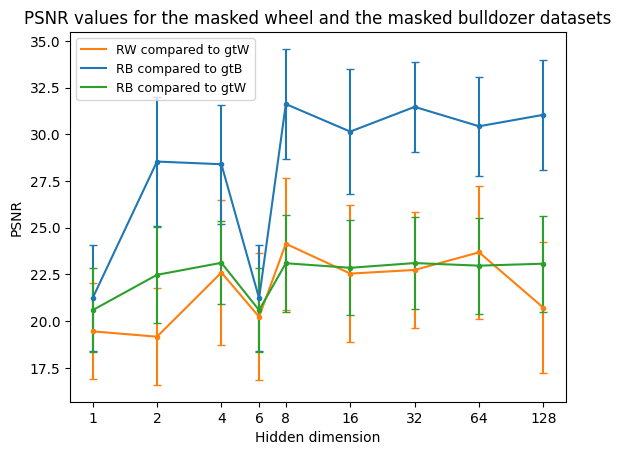

In [3]:
def format_ticks(value, pos):
    if value.is_integer():
        return str(int(value))
    else:
        return str(value)

psnr_values = psnr_values.rename(columns = {"masked_reconstructed_wheel_compared_to_original_wheel": "Reconstructed wheel compared to original wheel", "masked_reconstructed_bulldozer_compared_to_reconstructed_wheel" : "Reconstructed bulldozer to reconstructed wheel", "masked_reconstructed_bulldozer_compared_to_original_wheel": "Reconstructed bulldozer compared to original wheel", "masked_reconstructed_bulldozer_compared_to_original_bulldozer": "Reconstructed bulldozer compared to original bulldozer" })
psnr_values = psnr_values.rename(index = {"hd1": 1, "hd2" : 2, "hd4": 4, "hd6": 6, "hd8": 8, "hd16": 16, "hd32":32, "hd64": 64, "hd128": 128})

std_dev_values = pd.read_csv("psnr/std_dev.csv", index_col=0)


#psnr_values = psnr_values.drop(columns=["Reconstructed bulldozer to reconstructed wheel"])
plt.title('PSNR values for the masked wheel and the masked bulldozer datasets')
plt.xlabel('Hidden dimension')
plt.ylabel('PSNR')

custom_ticks = [1, 2, 4, 6, 8, 16, 32, 64, 128]
plt.xscale("log", base=2)
plt.xticks(custom_ticks)
c1 = "tab:orange"
c2 = "tab:blue"
c3 = "tab:green"

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.errorbar(psnr_values.index, psnr_values['Reconstructed wheel compared to original wheel'], yerr=std_dev_values['masked_reconstructed_wheel_compared_to_original_wheel'], c=c1, capsize=3, fmt='.-')
plt.errorbar(psnr_values.index, psnr_values['Reconstructed bulldozer compared to original bulldozer'], yerr=std_dev_values['masked_reconstructed_bulldozer_compared_to_original_bulldozer'], c=c2, capsize=3, fmt='.-')
plt.errorbar(psnr_values.index, psnr_values['Reconstructed bulldozer compared to original wheel'], yerr=std_dev_values['masked_reconstructed_bulldozer_compared_to_original_wheel'], c=c3, capsize=3, fmt='.-')


plt.legend(
    loc="upper left",
    handles=[
        Line2D([], [], c=c1, label="RW compared to gtW"),
        Line2D([], [], c=c2, label="RB compared to gtB"),
        Line2D([], [], c=c3, label="RB compared to gtW")
    ], fontsize="9"
)

plt.savefig("psnr_plot.png")